In [54]:
import numpy as np
from matplotlib import pyplot as plt   
import pandas as pd
import math
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
import cv2
plt.style.use(astropy_mpl_style)
#plt.style.use("default")
#import sys
#sys.path.append('/Users/shaivi/mypy/')
import tvg

In [55]:
conti = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_conti_index.fits')
magincl = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magincl_index.fits')
magfield = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magfield_index.fits')
dopp = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_dopp1_index.fits')

num_scans = 59
dim = conti[1].data.shape
data_conti = np.zeros((dim[0], dim[1], num_scans))
data_magincl = np.zeros((dim[0], dim[1], num_scans))
data_Bz = np.zeros((dim[0], dim[1], num_scans))
#data_dopp = np.zeros((dim[0], dim[1], num_scans))

for i in range(num_scans):
    data_conti_temp = conti[i+1].data
    #data_conti_2=(data_conti_temp - data_conti_temp.min())*(255.0/(data_conti_temp - data_conti_temp.min()).max())
    #data_conti[:,:,i] = data_conti_2
    data_conti[:,:,i] = data_conti_temp
    np.save('/Users/shaivi/Downloads/test_conti.npy', data_conti)
   
    data_magincl_temp = magincl[i+1].data
    #data_magincl_2=(data_magincl_temp - data_magincl_temp.min())*(255.0/(data_magincl_temp - data_magincl_temp.min()).max())
    #data_magincl[:,:,i] = data_magincl_2
    data_magincl[:,:,i] = data_magincl_temp
    np.save('/Users/shaivi/Downloads/test_magincl.npy', data_magincl)

    data_magfield_temp = magfield[i+1].data
    Bz_temp =  data_magfield_temp*(np.cos(np.array(np.deg2rad(data_magincl_temp))))
    #data_Bz_2=(Bz_temp - Bz_temp.min())*(255.0/(Bz_temp - Bz_temp.min()).max())
    #data_Bz[:,:,i] = data_Bz_2
    data_Bz[:,:,i] = Bz_temp
    
    np.save('/Users/shaivi/Downloads/test_Bz.npy', data_Bz)
    
    #data_dopp_temp = dopp[i+1].data
    #data_dopp_2=(data_dopp_temp - data_dopp_temp.min())*(255.0/(data_dopp_temp - data_dopp_temp.min()).max())
    #data_dopp[:,:,i] = data_dopp_2
    #np.save('/Users/shaivi/Downloads/test_dopp1.npy', data_dopp)
    
dim = data_Bz.shape
alltogether = np.zeros((dim[0], dim[1]*3, dim[2]))
j = 0; alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_conti
j = 1 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_magincl
j = 2 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_Bz
#j = 3 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_dopp


In [73]:
magincl[1].data.max()

180.0

In [74]:
magincl[1].data.min()


0.0

In [75]:
magfield[1].data.max()


2747.153

In [76]:
magfield[1].data.min()

0.0

In [77]:
Bz_temp.shape

(384, 120)

In [78]:
Bz_temp.min()

-1991.4783

In [79]:
Bz_temp.max()

1699.7595

In [ ]:
Bz_temp.dtype()

In [56]:
##find a way to restore the Bz maps and other maps to find max and min values across maps.


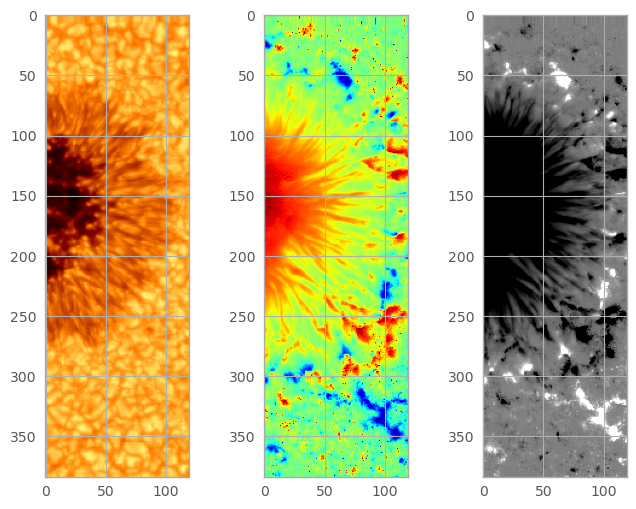

In [58]:
plt.ion()
fig, ax = plt.subplots(1,3)
ax[0].imshow(data_conti[:,:,0], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(data_magincl[:,:,5], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(data_Bz[:,:,5], cmap='gray', vmin=-500, vmax=500)
plt.savefig("initial.png")
plt.show()

##need to find correct threshlding values
...if i can do it for one image, will I be able to go it for multiple?
will it still work on different sequences?
also need to overlap images, between continuum and inclination....
bz may be helpful - need a different saturation

action plan:
#design an experiment for each one, design a test...
1. use only continuum, determine the thresholding coefficients where it correctly overlaps the head
2. then do the same for mag inclination
3. do this for multiple images to test
4. if it works, then overlap them

clarification: want to make sure that if I continue down this path, I can still trace back and pick apart the edges drawn to quantify these and make plots of their values over time.
- well you could fit a stright line to the data... you can refer back to the original image to see this and quantify the filaments.
- you could make a cloud of pixel values that are all the pixel position and look at the slope of the straight of the line, derive the angle, and say "this is the inclination".

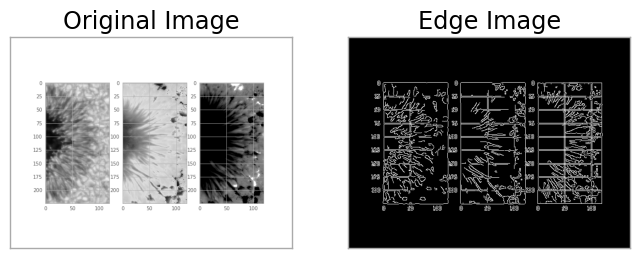

In [84]:
img = cv2.imread('initial.png',0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [60]:
img.shape

(432, 576)

In [61]:
edges.shape

(432, 576)

In [62]:
new = img+edges

In [71]:
new.shape
##the result has been scaled...

(432, 576)

In [70]:
img.min()
img.max()
new.min()
new.max()

255